In [1]:
from itertools import product
from utils.binaries import *
from utils.plotting import *
import os

15:55:49 (   +9.3s) [INFO   ] -- import logging
15:55:49 (  +171ms) [INFO   ] -- import numpy as np
15:55:49 (   +12ms) [INFO   ] -- import uncertainties
15:55:50 (  +424ms) [INFO   ] -- import pandas as pd
15:55:50 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
15:55:50 (    +3ms) [INFO   ] -- import binaries.tools as tools
15:55:50 (  +396ms) [INFO   ] -- import matplotlib.pyplot as plt
15:55:51 (  +552ms) [INFO   ] -- import seaborn as so
15:55:51 (    +3ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:55:51 (    +1ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:55:51 (    +1ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
15:55:51 (    +0ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
15:55:51 (    +1ms) [INFO   ] -- set SCAN_PATH = PosixPath('/cr/data01/filip/xy-calibration')
15:55:51 (    +1ms) [INFO   ] -- set OFLN_PATH = PosixPath('/cr/data01/filip/offline/insta

In [20]:
def visualize(z_close, z_far, max_scale, l=None):

    from matplotlib.colorbar import ColorbarBase
    from matplotlib.colors import CenteredNorm

    multiplicities = range(5, 45)
    threshold = np.linspace(0.05, 3.00, 295)

    z_close = z_close.reshape((len(multiplicities), len(threshold)))
    z_far = z_far.reshape((len(multiplicities), len(threshold)))
    # fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig, ax = plt.subplots(1, 1)

    # for ax, z, distance in zip(
    #     [ax1, ax2], [z_close, z_far], ["$<750\,$m", "$\geq750\,$m"]
    # ):
    z = z_close


    ax.set_box_aspect(1)
    image = ax.imshow(
        z.T,
        extent=(5, 45, 0.05, 3.00),
        aspect="auto",
        cmap="coolwarm",
        origin="lower",
        interpolation="none",
        vmin=-1,
        vmax=1,
    )

    ax.set_title("$<750\,$m")
    ax.set_xlabel("occupancy / bins")
    ax.set_yscale("log")
    _ = ax.set_yticks(
        [0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 2.0],
        ["0.2", "0.3", "0.4", "0.6", "0.8", "1.0", "2.0"],
    )
    ax.minorticks_off()

    ax.set_ylabel("threshold / $I^\mathrm{SSD}_\mathrm{histo}$")
    plt.colorbar(image, label="T2 rate / Hz")

    # cax = fig.add_axes([0.97, 0.1, 0.03, 0.8])
    # norm = CenteredNorm(0, max_scale)

    # ColorbarBase(
    #     cax,
    #     norm=norm,
    #     cmap=plt.cm.coolwarm,
    #     label=r"$\left(\mathrm{T2}_\mathrm{SSD}-\mathrm{T2}_\mathrm{WCD}\right)\,/\,n_\mathrm{Candidate}$",
    # )

    # plt.subplots_adjust(wspace=0.01)

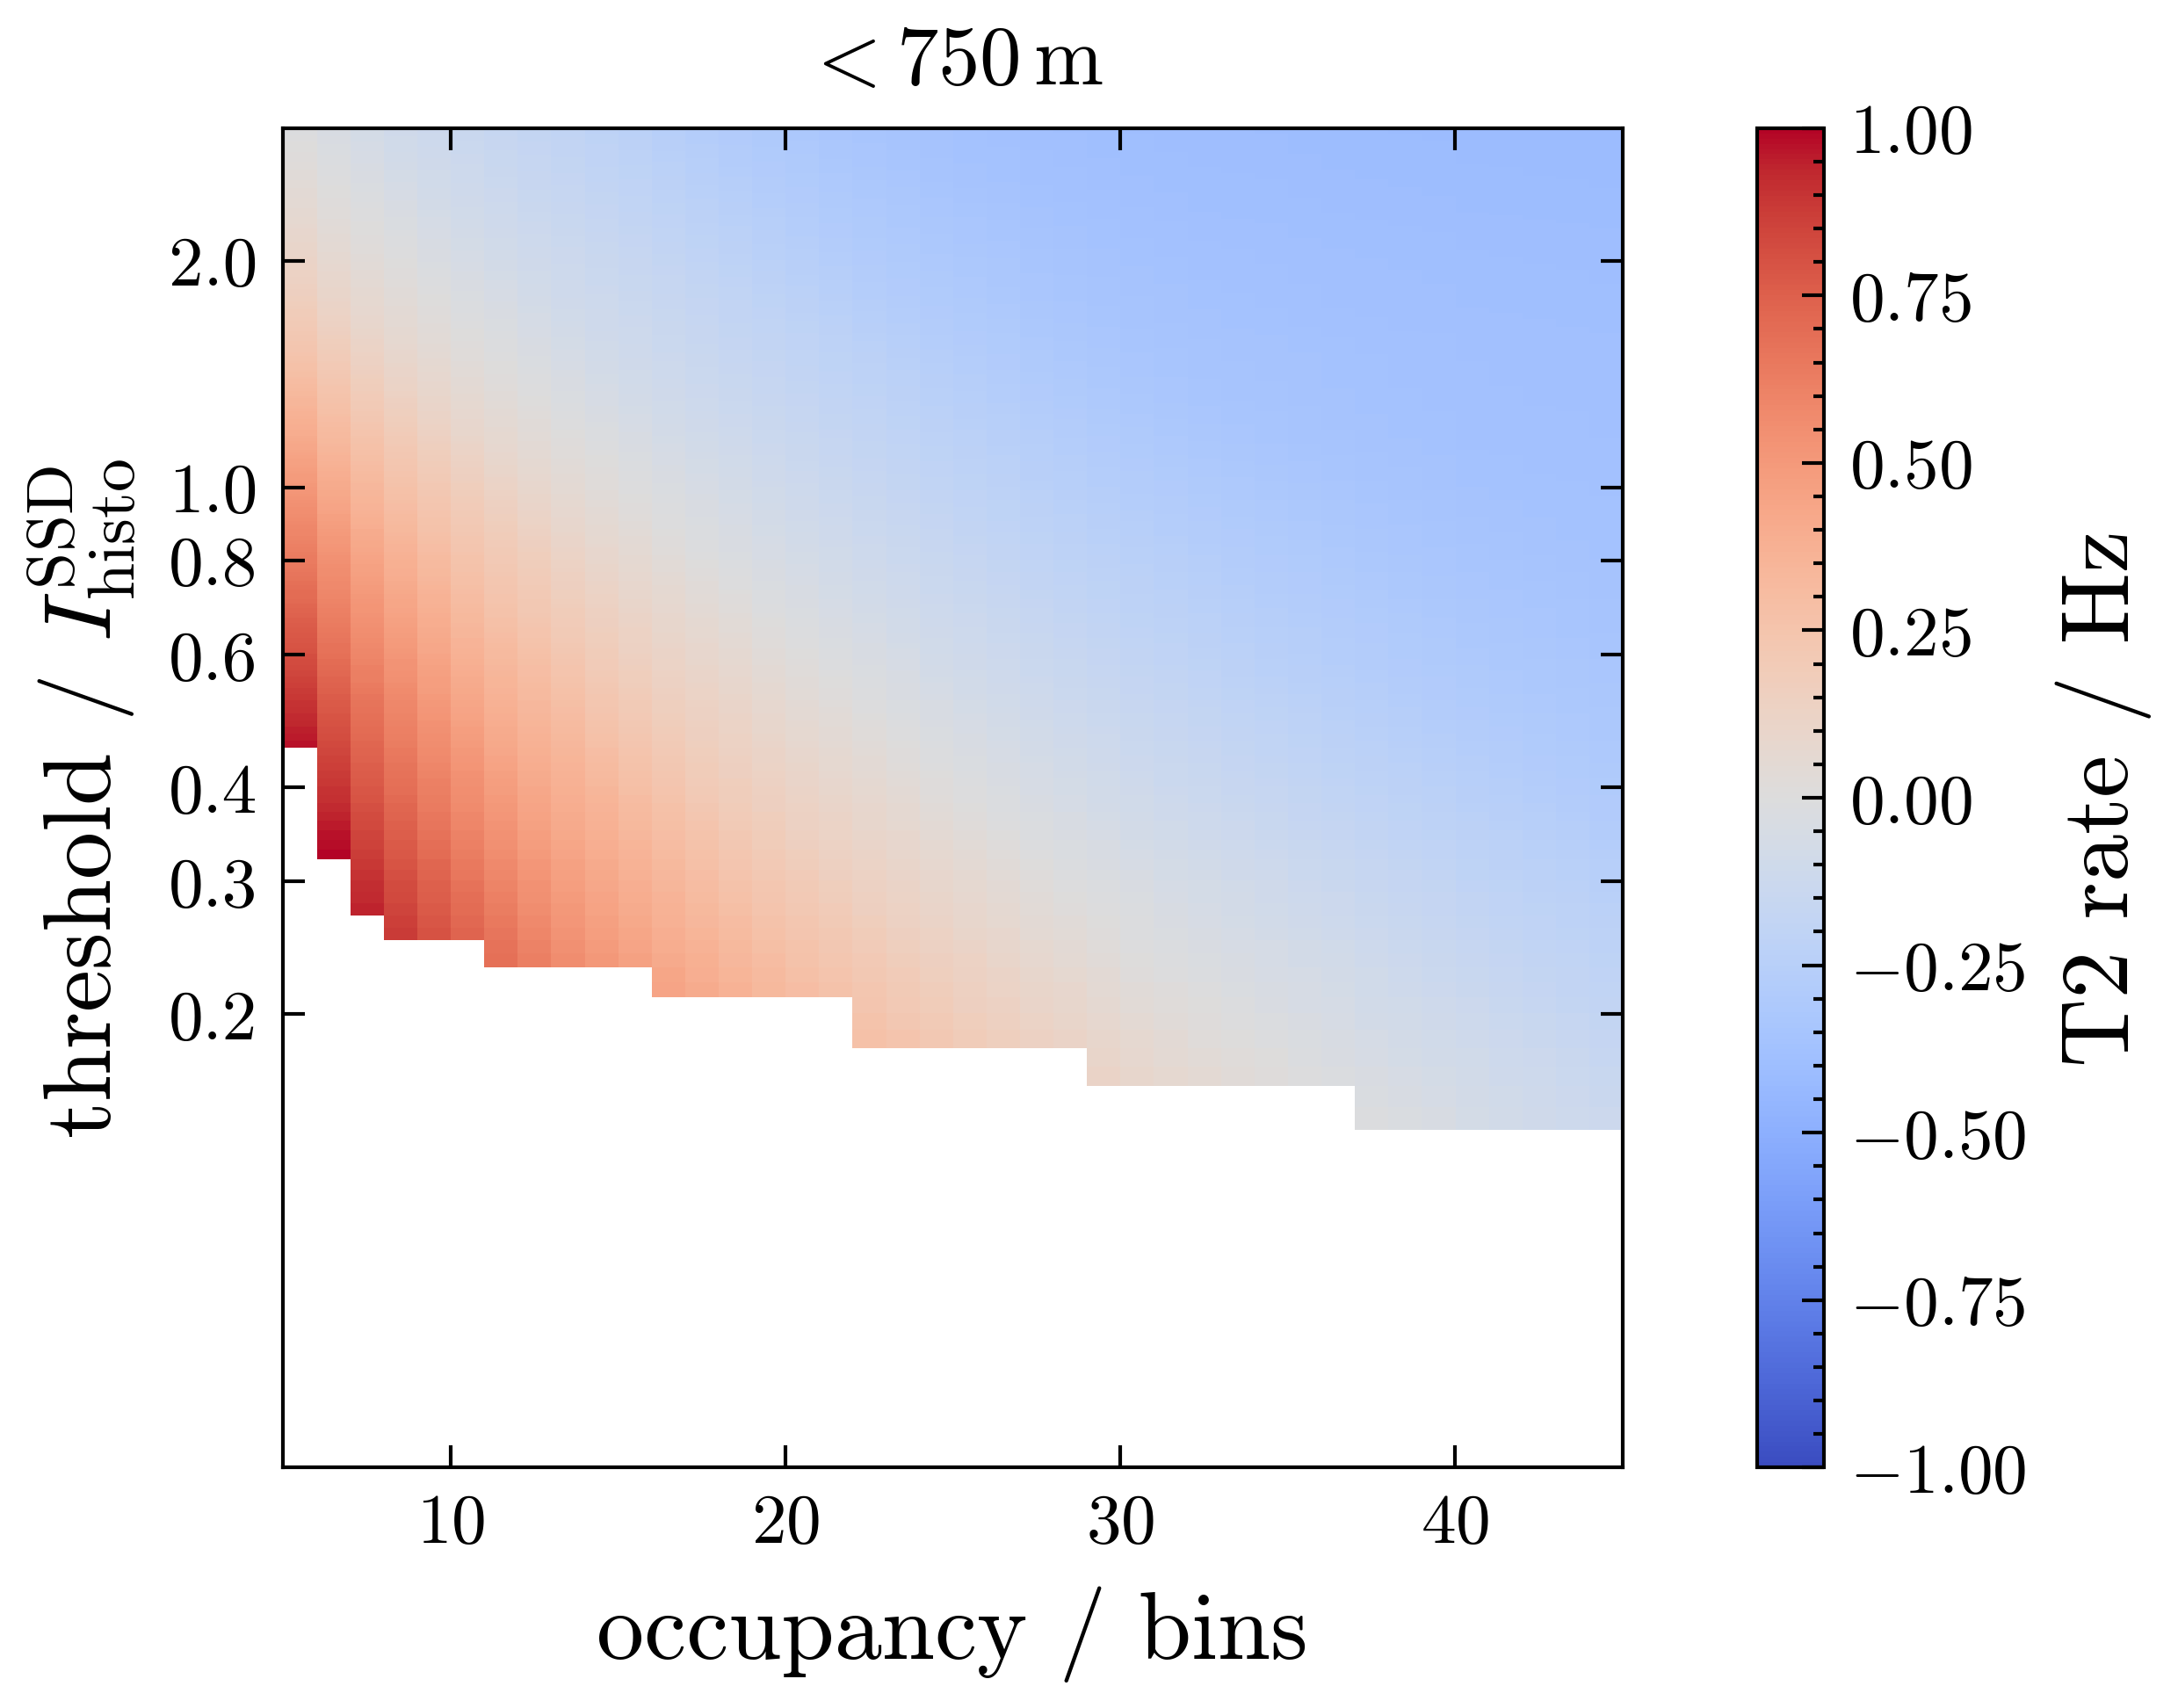

In [21]:
visualize(z_close, z_far, max_scale)

In [3]:
run_no = "photon"
src_dir = f"/cr/work/filip/SSDTriggerEfficiency/{run_no}_evaluated"
all_files = [f"{src_dir}/{file}" for file in os.listdir(src_dir)]

df = pd.read_csv(all_files[0], index_col="params")
for file in tools.ProgressBar(all_files[1:]):
    df += pd.read_csv(file, index_col="params")

2490/2490 [********************] || 00:00:23>00:00:00,       104.83 it/s


In [4]:
multiplicities = range(5, 45)
threshold = np.linspace(0.05, 3.00, 295)
all_params = list(product(multiplicities, threshold))

container = np.empty((4, len(all_params)))
container[:] = np.nan
x, y, z_close, z_far = container
max_scale = -np.inf
for index, row in df.iterrows():
    x_, y_ = [float(_) for _ in index[1:-1].split(",")]
    for i, (_x, _y) in enumerate(all_params):
        if _x == x_ and _y == y_:
            break

    f_far = row.sum_far / row.n_far
    f_close = row.sum_close / row.n_close

    this_max = max(
        np.max(f_far), np.max(f_close), np.abs(np.min(f_far)), np.abs(np.min(f_close))
    )
    if this_max > max_scale:
        max_scale = this_max

    x[i] = x_
    y[i] = y_
    z_far[i] = f_far
    z_close[i] = f_close

z_close /= max_scale
z_far /= max_scale

In [5]:
# visualize(z_close, z_far, max_scale)

In [6]:
# visualize(z_close, z_far, max_scale)